In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Resources/Big_Black_Money_Dataset.csv")
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [3]:
#Rename columns
df.rename(columns={
    'Transaction ID': 'transaction_id',
    'Country': 'country',
    'Amount (USD)': 'amount_usd',
    'Transaction Type': 'transaction_type',
    'Date of Transaction': 'transaction_date',
    'Person Involved': 'person_involved',
    'Industry': 'industry',
    'Destination Country': 'destination_country',
    'Reported by Authority': 'reported_by_authority',
    'Source of Money': 'source_of_money',
    'Money Laundering Risk Score': 'risk_score',
    'Shell Companies Involved': 'shell_co_involved',
    'Financial Institution': 'financial_ins',
    'Tax Haven Country': 'tax_country'
}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         10000 non-null  object 
 1   country                10000 non-null  object 
 2   amount_usd             10000 non-null  float64
 3   transaction_type       10000 non-null  object 
 4   transaction_date       10000 non-null  object 
 5   person_involved        10000 non-null  object 
 6   industry               10000 non-null  object 
 7   destination_country    10000 non-null  object 
 8   reported_by_authority  10000 non-null  bool   
 9   source_of_money        10000 non-null  object 
 10  risk_score             10000 non-null  int64  
 11  shell_co_involved      10000 non-null  int64  
 12  financial_ins          10000 non-null  object 
 13  tax_country            10000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usa

In [5]:
df.dtypes

transaction_id            object
country                   object
amount_usd               float64
transaction_type          object
transaction_date          object
person_involved           object
industry                  object
destination_country       object
reported_by_authority       bool
source_of_money           object
risk_score                 int64
shell_co_involved          int64
financial_ins             object
tax_country               object
dtype: object

In [6]:
# Format the transaction_date column to datetime format  
# df["transaction_date"] = pd.to_datetime(df.transaction_date*1e9)
#df["transaction_date"] = pd.to_datetime(df["transaction_date"].astype(int) * 1e9)
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df.head()

,transaction_id,country,amount_usd,transaction_type,transaction_date,person_involved,industry,destination_country,reported_by_authority,source_of_money,risk_score,shell_co_involved,financial_ins,tax_country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [7]:
# Export the DataFrame as a CSV file.
df.to_csv("cleaned_dataset.csv", index=False)

In [8]:
df.source_of_money.value_counts()

source_of_money
Illegal    7017
Legal      2983
Name: count, dtype: int64

In [9]:
df.transaction_type.value_counts()

transaction_type
Property Purchase    2086
Stocks Transfer      1983
Offshore Transfer    1980
Cash Withdrawal      1978
Cryptocurrency       1973
Name: count, dtype: int64

In [10]:
df.industry.value_counts()

industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Casinos         1377
Oil & Gas       1372
Name: count, dtype: int64

In [11]:
df.reported_by_authority.value_counts()

reported_by_authority
False    7995
True     2005
Name: count, dtype: int64

# Pre-processing & Feature Engineering

In [12]:
# NO IMPUTATION NEEDED - b/c NO NULL VALUES 
# source_of_money and reported_by_authority have 2 categories - a BINARY / BOOLEAN class - ORDINAL Encoding
# transaction_type has 5 categories and industry has 7 categories => One Hot Encoding (get dummies)

In [13]:
# Label(original) Encode 0/1 manualy
# df["reported_by_authority"] = df.reported_by_authority.apply(lambda x: 0 if x == True else 1) # manual way
df["source_of_money"] = df.source_of_money.apply(lambda x: 0 if x == 'Illegal' else 1) # manual way
df.head()

,transaction_id,country,amount_usd,transaction_type,transaction_date,person_involved,industry,destination_country,reported_by_authority,source_of_money,risk_score,shell_co_involved,financial_ins,tax_country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,0,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,0,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,0,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,0,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,0,1,9,Bank_57,Luxembourg


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_id         10000 non-null  object        
 1   country                10000 non-null  object        
 2   amount_usd             10000 non-null  float64       
 3   transaction_type       10000 non-null  object        
 4   transaction_date       10000 non-null  datetime64[ns]
 5   person_involved        10000 non-null  object        
 6   industry               10000 non-null  object        
 7   destination_country    10000 non-null  object        
 8   reported_by_authority  10000 non-null  bool          
 9   source_of_money        10000 non-null  int64         
 10  risk_score             10000 non-null  int64         
 11  shell_co_involved      10000 non-null  int64         
 12  financial_ins          10000 non-null  object        
 13  ta

In [15]:
# Drop useless columns and move on to Encoding
cols_to_drop = ['country', 'transaction_date', 'person_involved',
       'destination_country','financial_ins', 'tax_country']
df = df.drop(columns=cols_to_drop) #, inplace=True
df.head()

,transaction_id,amount_usd,transaction_type,industry,reported_by_authority,source_of_money,risk_score,shell_co_involved
0,TX0000000001,3.267530e+06,Offshore Transfer,Construction,True,0,6,1
1,TX0000000002,4.965767e+06,Stocks Transfer,Luxury Goods,False,0,9,0
2,TX0000000003,9.416750e+04,Stocks Transfer,Construction,True,0,1,3
3,TX0000000004,3.864201e+05,Cash Withdrawal,Oil & Gas,False,0,7,2
4,TX0000000005,6.433784e+05,Cryptocurrency,Real Estate,True,0,1,9


In [16]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features 
numeric_features = ['amount_usd', 'risk_score', 'shell_co_involved'] # You can also do this in a loop, select the numeric columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features (Sex, Has_Cabin)
binary_features = ['reported_by_authority']
binary_transformer = Pipeline(steps=[
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features (Pclass, Embarked) 
categorical_features = ['transaction_type', 'industry']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])


In [17]:
# Correlation Analysis (this is optional and not needed for the ML Experiment)
# It just shows what the data looks like after transformation before training
# We will still declare a full pipeline of preprocessing + training

# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features + binary_features +
                         list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final["source_of_money"] = df.source_of_money
df_final.head()

,amount_usd,risk_score,shell_co_involved,reported_by_authority,transaction_type_Cash Withdrawal,transaction_type_Cryptocurrency,transaction_type_Offshore Transfer,transaction_type_Property Purchase,transaction_type_Stocks Transfer,industry_Arms Trade,industry_Casinos,industry_Construction,industry_Finance,industry_Luxury Goods,industry_Oil & Gas,industry_Real Estate,source_of_money
0,0.537609,0.163680,-1.204808,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1.729945,1.200501,-1.552075,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-1.690418,-1.564356,-0.510274,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,-1.485226,0.509287,-0.857541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,-1.304815,-1.564356,1.573328,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [18]:
# Feature selection
# correlation analysis
corrs = df_final.corr()
corrs

,amount_usd,risk_score,shell_co_involved,reported_by_authority,transaction_type_Cash Withdrawal,transaction_type_Cryptocurrency,transaction_type_Offshore Transfer,transaction_type_Property Purchase,transaction_type_Stocks Transfer,industry_Arms Trade,industry_Casinos,industry_Construction,industry_Finance,industry_Luxury Goods,industry_Oil & Gas,industry_Real Estate,source_of_money
amount_usd,1.000000,0.016529,-0.017905,0.005214,0.001999,0.006722,0.009027,-0.018486,0.001110,0.012692,-0.005406,0.010555,0.009057,-0.010394,-0.009966,-0.006831,0.011386
risk_score,0.016529,1.000000,-0.019262,0.003502,0.004146,-0.003351,-0.009477,-0.003323,0.012061,0.006216,0.004127,0.008168,0.026662,-0.021834,-0.013583,-0.010091,-0.002059
shell_co_involved,-0.017905,-0.019262,1.000000,0.020544,-0.012246,0.019885,0.011206,-0.007792,-0.010871,0.010392,0.017398,-0.013702,0.009072,-0.007757,-0.016857,0.001547,-0.006620
reported_by_authority,0.005214,0.003502,0.020544,1.000000,-0.017926,0.000887,0.016929,0.008457,-0.008514,-0.008249,0.026030,-0.017493,-0.008267,0.018021,-0.004418,-0.005204,0.003226
transaction_type_Cash Withdrawal,0.001999,0.004146,-0.012246,-0.017926,1.000000,-0.246183,-0.246727,-0.254936,-0.246960,0.001665,-0.000270,0.020768,-0.006906,0.008825,-0.005386,-0.018879,-0.007702
transaction_type_Cryptocurrency,0.006722,-0.003351,0.019885,0.000887,-0.246183,1.000000,-0.246339,-0.254534,-0.246571,0.005782,0.003878,-0.009292,-0.001430,0.000099,0.009717,-0.008369,0.007939
transaction_type_Offshore Transfer,0.009027,-0.009477,0.011206,0.016929,-0.246727,-0.246339,1.000000,-0.255097,-0.247116,-0.013664,-0.000470,-0.008585,0.019072,0.008614,-0.012878,0.007346,0.004040
transaction_type_Property Purchase,-0.018486,-0.003323,-0.007792,0.008457,-0.254936,-0.254534,-0.255097,1.000000,-0.255337,0.005679,-0.004458,0.004492,-0.006722,-0.016278,0.001288,0.016103,-0.001750
transaction_type_Stocks Transfer,0.001110,0.012061,-0.010871,-0.008514,-0.246960,-0.246571,-0.247116,-0.255337,1.000000,0.000435,0.001413,-0.007471,-0.003885,-0.000938,0.007240,0.003464,-0.002483
industry_Arms Trade,0.012692,0.006216,0.010392,-0.008249,0.001665,0.005782,-0.013664,0.005679,0.000435,1.000000,-0.162169,-0.167794,-0.168802,-0.167727,-0.161827,-0.166649,-0.003636


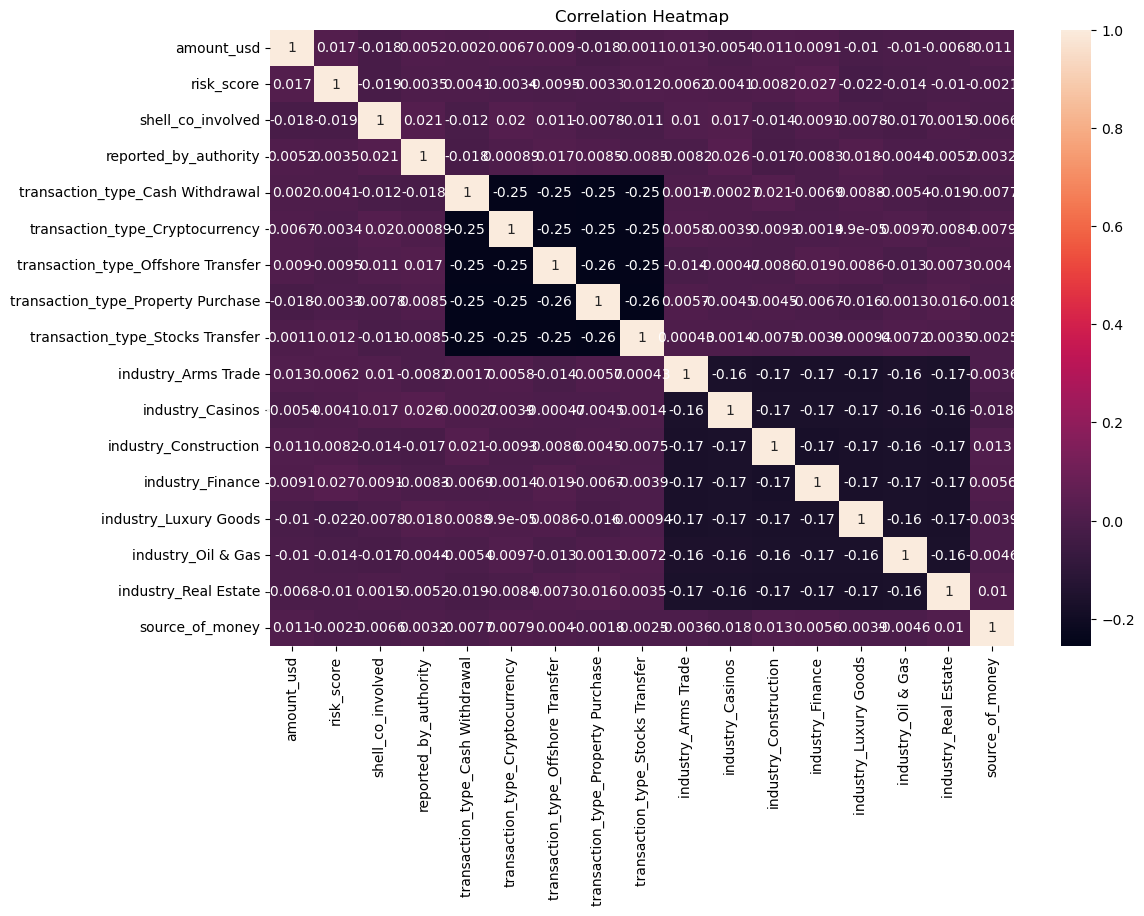

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
abs(corrs.source_of_money).sort_values(ascending=False)

source_of_money                       1.000000
industry_Casinos                      0.017608
industry_Construction                 0.013297
amount_usd                            0.011386
industry_Real Estate                  0.010296
transaction_type_Cryptocurrency       0.007939
transaction_type_Cash Withdrawal      0.007702
shell_co_involved                     0.006620
industry_Finance                      0.005552
industry_Oil & Gas                    0.004617
transaction_type_Offshore Transfer    0.004040
industry_Luxury Goods                 0.003851
industry_Arms Trade                   0.003636
reported_by_authority                 0.003226
transaction_type_Stocks Transfer      0.002483
risk_score                            0.002059
transaction_type_Property Purchase    0.001750
Name: source_of_money, dtype: float64

# MACHINE LEARNING

In [21]:
# Step 1: Get the Data
X = df.drop(columns=["source_of_money"])
y = df.source_of_money

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify ensures same % of the target classes in the train/test

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(10000, 7)
(7500, 7)
(2500, 7)


In [22]:
# Export the DataFrame as a CSV file.
X_test.to_csv("Resources/test.csv", index=False)

In [23]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[5263    0]
 [2237    0]]
    
    AUC: 0.5202890328998651

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      5263
           1       0.00      0.00      0.00      2237

    accuracy                           0.70      7500
   macro avg       0.35      0.50      0.41      7500
weighted avg       0.49      0.70      0.58      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1754    0]
 [ 746    0]]
    
    AUC: 0.491707197031068

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      1754
           1       0.00      0.00      0.00       746

    accuracy                           0.70      2500
   macro avg       0.35      0.50      0.41      2500
weighted avg       0.49      0.70      0.58      2500

    


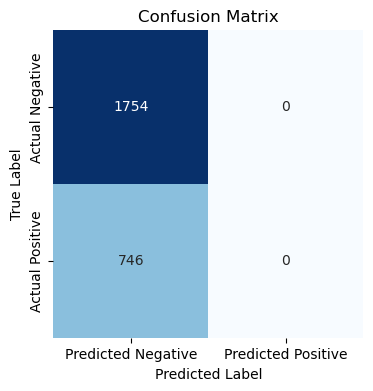

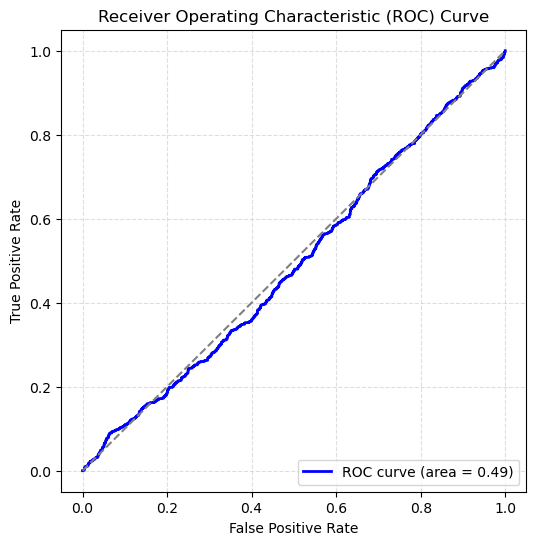

In [24]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5263    0]
 [   0 2237]]
    
    AUC: 0.9999999999999999

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      5263
           1       1.00      1.00      1.00      2237

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1520  234]
 [ 647   99]]
    
    AUC: 0.5003408524674355

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.87      0.78      1754
           1       0.30      0.13      0.18       746

    accuracy                           0.65      2500
   macro avg       0.50      0.50      0.48      2500
weighted avg       0.58      0.65      0.60      2500

    


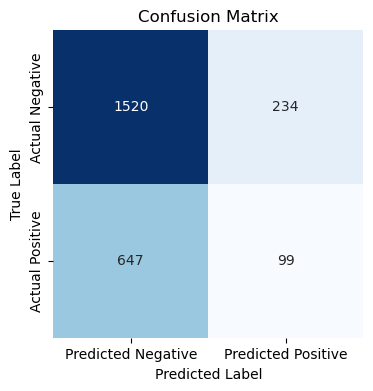

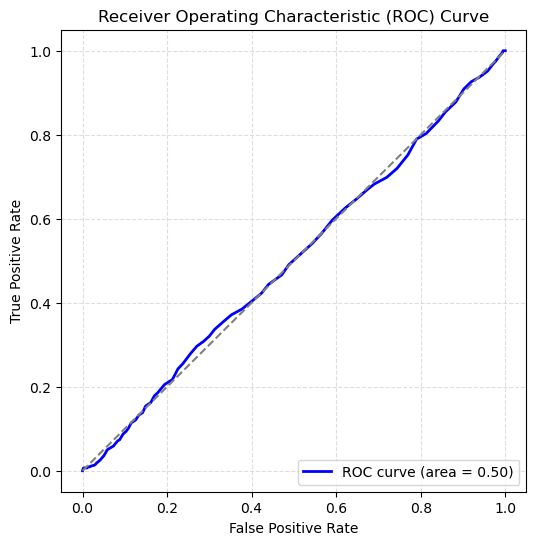

In [25]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5263    0]
 [2237    0]]
    
    AUC: 0.5210332572829218

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      5263
           1       0.00      0.00      0.00      2237

    accuracy                           0.70      7500
   macro avg       0.35      0.50      0.41      7500
weighted avg       0.49      0.70      0.58      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1754    0]
 [ 746    0]]
    
    AUC: 0.48049498503611815

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      1754
           1       0.00      0.00      0.00       746

    accuracy                           0.70      2500
   macro avg       0.35      0.50      0.41      2500
weighted avg       0.49      0.70      0.58      2500

    


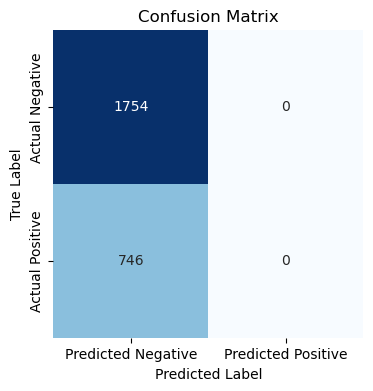

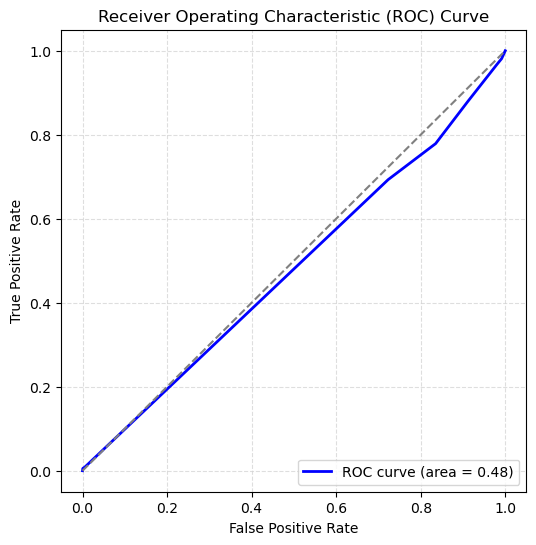

In [26]:
 # Step 2: Init the Model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5256    7]
 [2187   50]]
    
    AUC: 0.6814768479710627

    Classification Report:
                  precision    recall  f1-score   support

           0       0.71      1.00      0.83      5263
           1       0.88      0.02      0.04      2237

    accuracy                           0.71      7500
   macro avg       0.79      0.51      0.44      7500
weighted avg       0.76      0.71      0.59      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1747    7]
 [ 736   10]]
    
    AUC: 0.4935043149171102

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      1754
           1       0.59      0.01      0.03       746

    accuracy                           0.70      2500
   macro avg       0.65      0.50      0.43      2500
weighted avg       0.67      0.70      0.59      2500

    


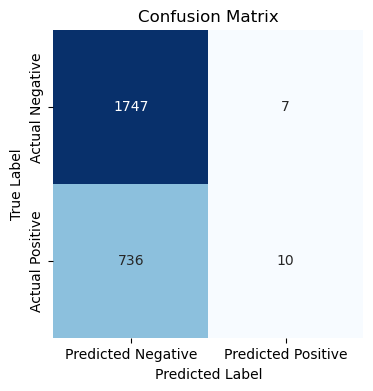

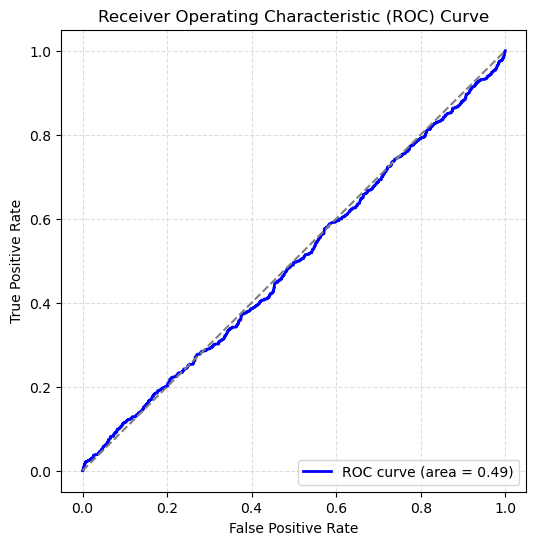

In [27]:
 # Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [28]:
 from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[5195   68]
 [1196 1041]]
    
    AUC: 0.9361606328744176

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.99      0.89      5263
           1       0.94      0.47      0.62      2237

    accuracy                           0.83      7500
   macro avg       0.88      0.73      0.76      7500
weighted avg       0.85      0.83      0.81      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1554  200]
 [ 677   69]]
    
    AUC: 0.4786596549900496

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.89      0.78      1754
           1       0.26      0.09      0.14       746

    accuracy                           0.65      2500
   macro avg       0.48      0.49      0.46      2500
weighted avg       0.57      0.65      0.59      2500

    


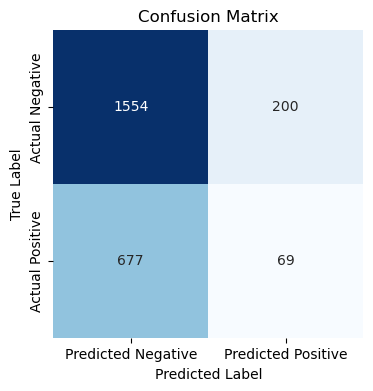

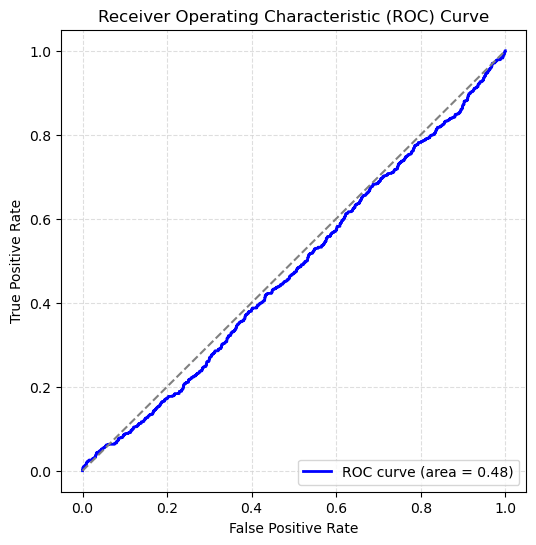

In [29]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5227   36]
 [1929  308]]
    
    AUC: 0.8501317936274788

    Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.99      0.84      5263
           1       0.90      0.14      0.24      2237

    accuracy                           0.74      7500
   macro avg       0.81      0.57      0.54      7500
weighted avg       0.78      0.74      0.66      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1700   54]
 [ 723   23]]
    
    AUC: 0.4870009874022151

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.97      0.81      1754
           1       0.30      0.03      0.06       746

    accuracy                           0.69      2500
   macro avg       0.50      0.50      0.43      2500
weighted avg       0.58      0.69      0.59      2500

    


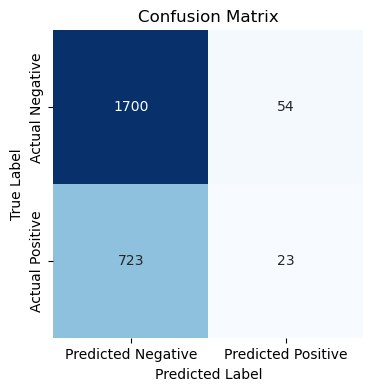

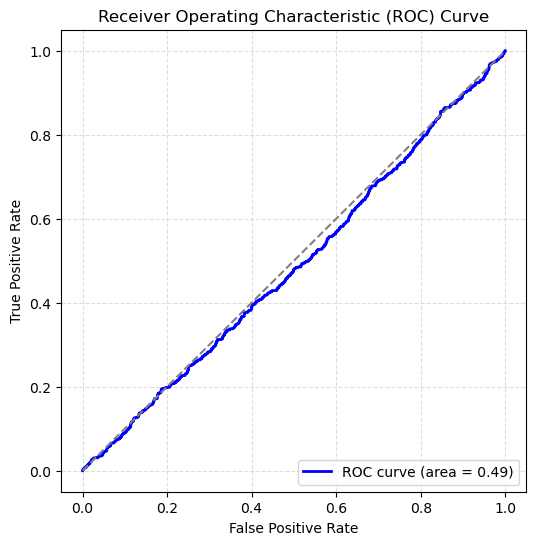

In [30]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

# Cross_validation

In [31]:
# Create a pipeline with a scaler and a logistic regression model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.49370566 0.5029709  0.49469729 0.4814056  0.47531074]
Mean AUC: 0.490


In [32]:
 # Create a pipeline with a scaler and a GradientBoostingClassifier model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(gb, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.51304757 0.49842253 0.52970424 0.50642736 0.48312303]
Mean AUC: 0.506


In [43]:
 # Create a pipeline with a scaler and a GradientBoostingClassifier model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(gb, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.51304757 0.49842253 0.52970424 0.50642736 0.48312303]
Mean AUC: 0.506


# Model Productionalization

In [33]:
# Retrain the model on the ENTIRE dataset
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
gb.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['amount_usd', 'risk_score',
                                                   'shell_co_involved']),
                                                 ('binary',
                                                  Pipeline(steps=[('label',
                                                                   OrdinalEncoder())]),
                                                  ['reported_by_authority']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transaction_type',
                                                   'industry'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [34]:
# Save off my models (For scikit-learn models, the best way to save the models off is a library called Pickle)
import pickle
# Save model
model = pickle.dump(gb, open("model_pipeline.pkl", 'wb')) # wb = write binary for the h5 file
# Model
pickle.dump(gb, open("black_money_model_1.h5", 'wb'))

# Let's make some prediction on the TEST SET


In [35]:
df_test = pd.read_csv("Resources/test.csv")
df_test.head()

,transaction_id,amount_usd,transaction_type,industry,reported_by_authority,risk_score,shell_co_involved
0,TX0000008230,3.440533e+06,Cash Withdrawal,Real Estate,False,8,3
1,TX0000001831,4.600277e+06,Property Purchase,Construction,False,10,3
2,TX0000001553,4.228378e+05,Stocks Transfer,Oil & Gas,False,5,4
3,TX0000005591,7.139756e+05,Stocks Transfer,Luxury Goods,False,9,5
4,TX0000000205,4.633506e+06,Stocks Transfer,Casinos,False,9,4


In [36]:
# Save IDs for later
ids = df_test.transaction_id
df_test.drop(columns=["transaction_id"], inplace=True)
df_test.head()

,amount_usd,transaction_type,industry,reported_by_authority,risk_score,shell_co_involved
0,3.440533e+06,Cash Withdrawal,Real Estate,False,8,3
1,4.600277e+06,Property Purchase,Construction,False,10,3
2,4.228378e+05,Stocks Transfer,Oil & Gas,False,5,4
3,7.139756e+05,Stocks Transfer,Luxury Goods,False,9,5
4,4.633506e+06,Stocks Transfer,Casinos,False,9,4


In [37]:
df_test.columns

Index(['amount_usd', 'transaction_type', 'industry', 'reported_by_authority',
       'risk_score', 'shell_co_involved'],
      dtype='object')

In [38]:
# model
model = pickle.load(open("black_money_model_1.h5", 'rb'))

# ensure columns in order
df_test = df_test.loc[:, ['amount_usd', 'transaction_type', 'industry', 'reported_by_authority', 'risk_score', 'shell_co_involved']]
preds = model.predict(df_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
print(len(ids))
print(len(preds))

2500
2500


In [40]:
submission = pd.DataFrame()
submission["transaction_id"] = ids  
submission["source_of_money"] = preds
submission.head()

,transaction_id,source_of_money
0,TX0000008230,0
1,TX0000001831,0
2,TX0000001553,0
3,TX0000005591,0
4,TX0000000205,0


In [41]:
submission.to_csv("Resources/black_money_submission2.csv", index=False)

In [42]:
# 'amount_usd', 'transaction_type', 'industry', 'reported_by_authority', 'risk_score', 'shell_co_involved'
df_lol = pd.DataFrame()
df_lol["amount_usd"] = ["3.440533e+06"]
df_lol["transaction_type"] = ["Cash Withdrawal"]
df_lol["industry"] = ["Real Estate"]
df_lol["reported_by_authority"] = [False]
df_lol["risk_score"] = ["8"]
df_lol["shell_co_involved"] = [3]
model.predict_proba(df_lol)

array([[0.68746707, 0.31253293]])